In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

In [151]:
# log_filename = '/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/logs/log-2024-08-15_12-02-20.csv'
# log_filename = '/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/logs/log-2024-10-04_18-21-12.csv'
log_filename = '/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/logs/log-2024-10-04_19-03-48.csv'

df = pd.read_csv(log_filename, header=0)
df

,timestamp,t,action,reward,reward_adjusted,new_Q_value,alpha,epsilon
0,2024-10-04 19:03:57,1,3,-1,-1,-0.5,0.500000,1.000000
1,2024-10-04 19:03:59,2,1,0,0,0.0,0.500000,1.000000
2,2024-10-04 19:04:01,3,4,-3,-3,-1.5,0.500000,1.000000
3,2024-10-04 19:04:03,4,2,-2,-2,-1.0,0.500000,1.000000
4,2024-10-04 19:04:05,5,0,-2,-2,-1.0,0.500000,1.000000
...,...,...,...,...,...,...,...,...
115,2024-10-04 19:07:35,116,1,0,0,0.0,0.007291,0.014583
116,2024-10-04 19:07:37,117,1,0,0,0.0,0.007291,0.014583
117,2024-10-04 19:07:39,118,1,-1,0,0.0,0.007291,0.014583
118,2024-10-04 19:07:41,119,1,0,0,0.0,0.007291,0.014583


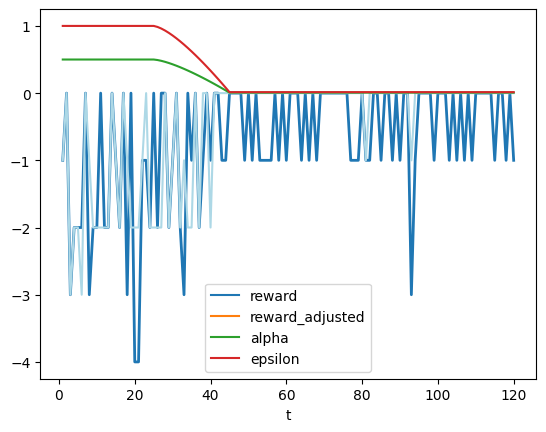

In [152]:
df_plot = df



# Rewards and adjuste drewads plot

ax = df_plot.plot('t', ['reward', 'reward_adjusted', 'alpha', 'epsilon'])
lines = ax.get_lines()
lines[0].set_linewidth(2)  # Make the reward line thicker
lines[1].set_color('lightblue')  # Make the reward_adjusted line light blue



# df_plot

# The first step nicely illustrates the current alpha value: whatever reward
# we will get, the q value of that action will be set to 0.5 of that

# Also illustrates how even if we learn some new information about an action
# in the later stage of the episode, it's q value will remain relatively unchanged
# because of the low alpha value


In [153]:
import matplotlib.pyplot as plt

# Get the first 5 standard colors from the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:5]

# Create a map that maps integers to these colors
color_map = {i: color for i, color in enumerate(colors)}

color_map

{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd'}

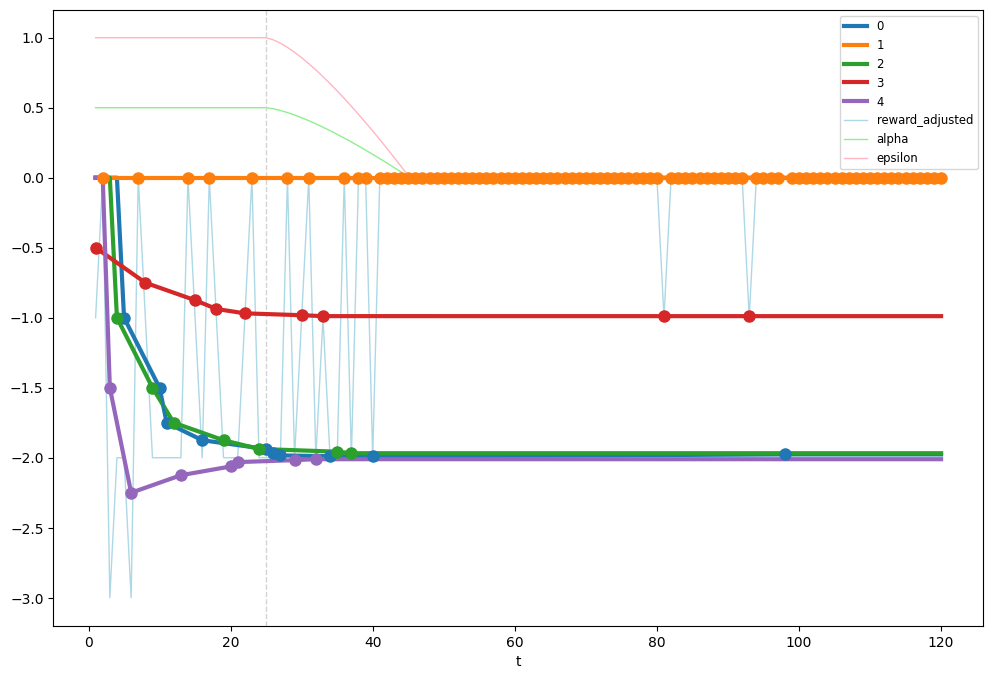

In [154]:
def plot_q_learning(df, fig, ax):
    initial_q_value = 0
    
    df_plot_q_values = df.pivot(index='t', columns='action', values='new_Q_value')
    
    # Draw dots if the action was chosen
    # Need the NaNs here
    line_colors = [color_map[col] for col in df_plot_q_values.columns]
    df_plot_q_values.plot(ax=ax, marker='o', markersize=8, zorder=3, color=line_colors)

    
    # Draw lines connecting the dots, representing current Q values
    df_plot_q_values = df_plot_q_values.interpolate()
    df_plot_q_values = df_plot_q_values.fillna(initial_q_value)    

    for col in range(5):
        if col not in df_plot_q_values.columns:
            df_plot_q_values[col] = initial_q_value

    df_plot_q_values.plot(ax=ax, linewidth=3, color=line_colors)




    df_plot = df

    df_plot.plot('t', [
        # 'reward', 
        'reward_adjusted', 
        'alpha', 'epsilon'], color=['lightblue', 'lightgreen', 'lightpink'],
        ax=ax, zorder=0,
        linewidth=1)

    # lines = ax.get_lines()
    # lines[0].set_linewidth(2)  # Make the reward line thicker
    # lines[1].set_color('lightblue')  # Make the reward_adjusted line light blue
    # lines[0].set_linestyle('--')  # Make the reward line dashed

    # Draw a vertical light gray line at x=25
    ax.axvline(x=25, color='lightgray', linestyle='--', zorder=0, linewidth=1)

    # Make the plot bigger
    fig = plt.gcf()
    fig.set_size_inches(12, 8)


    # Make the legend smaller
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[5:], labels[5:], fontsize='small')


fig, ax = plt.subplots()
plot_q_learning(df, fig, ax)


In [155]:
import time

In [ ]:
log_filename = '/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/logs/log-2024-10-04_19-03-48.csv'

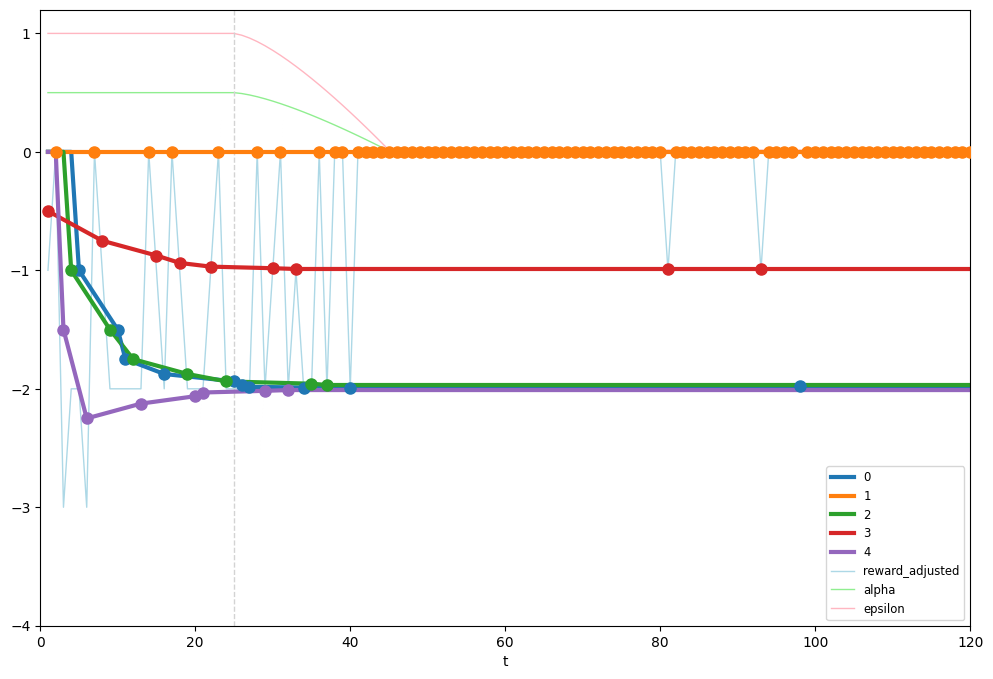

<Figure size 1200x800 with 0 Axes>

In [149]:
max_steps = 120


fig, ax = plt.subplots(figsize=(12, 8))


df = pd.read_csv(log_filename, header=0)


# df_plot = pd.DataFrame(index=range(max_steps), columns=df.columns)
# df_plot['t'] = range(1, max_steps + 1)

for i in range(max_steps):
    
    # df_plot.iloc[:i+1] = df.iloc[:i+1]
    df_plot = df.iloc[:i+1]

    
    # Clear previous axis, otherwise it starts adding new colors
    ax.clear()
    ax.set_xlim(0, max_steps)
    ax.set_ylim(-4, 1.2)
    


    # df_plot.plot('t', 'reward_adjusted', ax=ax)
    plot_q_learning(df_plot, fig, ax)
    
    
    
    
    
    display.clear_output(wait=True)
    display.display(fig)
    plt.close(fig)




    time.sleep(0.25)
